# Algorithme kmeans

## Chargement des données
* Nous allons diminuer le nombre de couleurs d'une image en gardant son aspect
* Importation des bibliothèques : numpy, matplotlib
* Shuffle va nous servir à convertir une image en matrice
* Importation de l'image à partir de scikit-learn

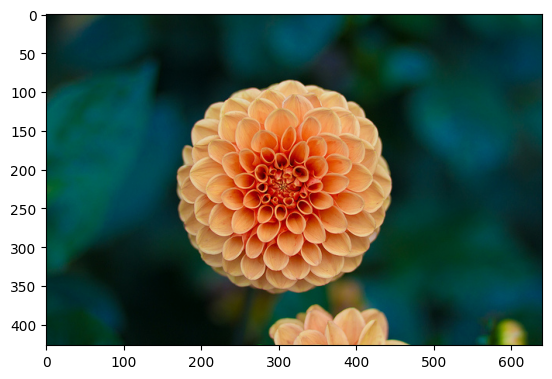

In [72]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans


# 1/ choisir le nombre de partition || la distance maximal pour évaluer que ces data sont proches

# 2/ le K siginfie le nombre de GRP que l'on veut 

# 3/ toutes les données doivent être chiffré pour être 

# 4/ l'ago défini des chefs de GRP au centre des catéfories, 
#       définie l'appartenance de ces individus en funciton de la proximité avec le chef
#       redéfinie le chef et recommance 


flower = load_sample_image('flower.jpg')
plt.imshow(flower)
flower

# NEXT => On va calculer la distance entre deux couleurs => k-means


# division par 255 à cause du system RGB
flower = np.array(flower, dtype=np.float64) / 255




## Conversion de l'image en matrice
* Il faut que l'image soit sous forme de matrice pour pouvoir la traiter
* n_colors correspond au nombre de couleurs différentes (nombre de groupes de l'algorithme kmeans)

In [73]:

# flower[0] => first line 
# flower[0][0] => premier element, première ligne
# flower.shape => (427, 640, 3) => 427 ligne, 640 element/ligne, 3 composante dans 1 element
w, h, d = flower.shape
print(w, h, d)

# 1/  transformation de l'image en un array d'une seul ligne 

tab_img = np.reshape(flower, (w * h, d))
tab_img

# 2/ mélanger les données de l'array

echantillon = shuffle(tab_img, random_state=101, n_samples=1000)
echantillon

# 3/ choisir le nombre de couleur de l'image 
# image de base 255 * 255 * 255 = 16 million de couleur diff. possible 

nb_couleur = 200

# 4/ Choisir les centre de gravité 
    # réduire 16 million à 12

kmeans = KMeans(n_clusters=nb_couleur, random_state=42).fit(echantillon)

# 5/ prédiciotn pour chaque point de l'image de quel point il se rapproche le plus

labels = kmeans.predict(tab_img)
labels


427 640 3


array([8, 8, 8, ..., 3, 3, 3], dtype=int32)

## Fonction de reconstruction de l'image

In [74]:
# cluster_centers tableau qui contien les 12 points représentatif de notre image 

def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image



## Affichage de l'image reconstituée

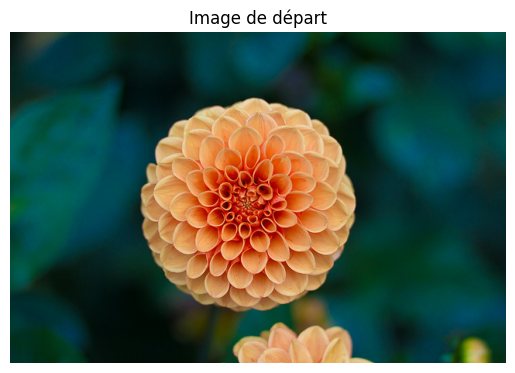

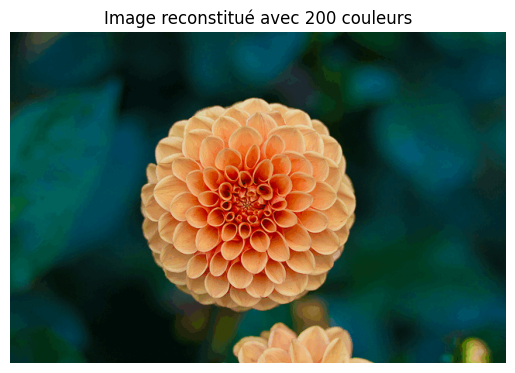

In [75]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Image de départ')
plt.imshow(flower)


plt.figure(2)
plt.clf()
plt.axis('off')
str = f'Image reconstitué avec {nb_couleur} couleurs'
plt.title(str)
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w=w, h=h))



* Voyons ce qui se passe en changeant le nombre de couleurs